In [40]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["target"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


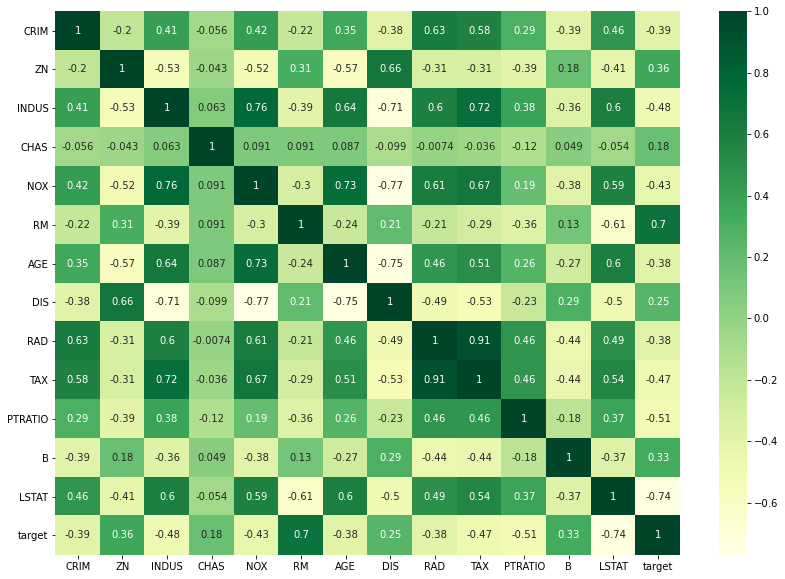

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(14, 10))
sns.heatmap(df.astype("float").corr(), cmap="YlGn", annot = True)

In [42]:
# (有看過的資料)做出公式 -> (沒看過的資料)驗證一下公式的好壞
from sklearn.model_selection import train_test_split
# [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test= train_test_split(boston["data"], 
                                                   boston["target"], 
                                                   test_size=0.1)

In [43]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

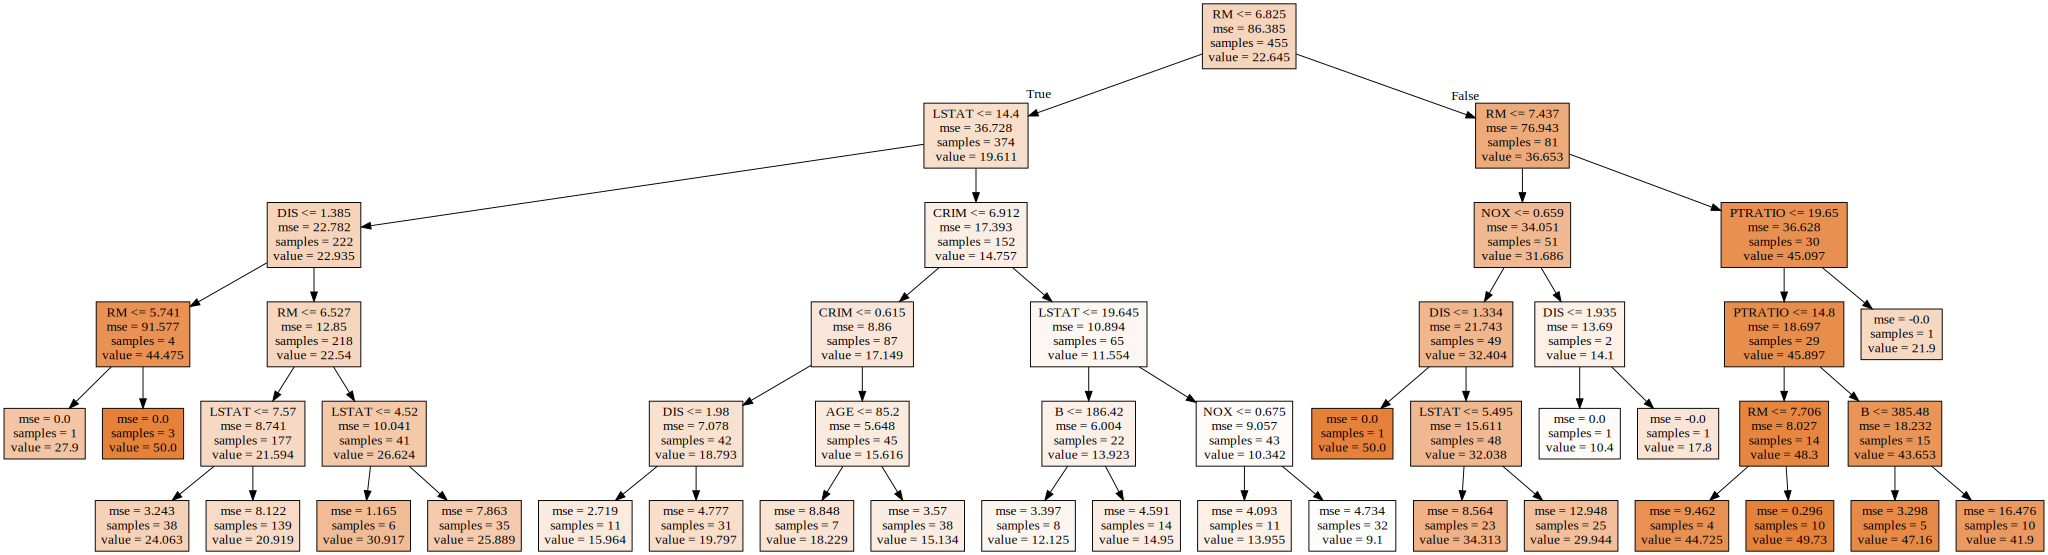

In [44]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg, out_file=None, feature_names=boston["feature_names"],filled=True)
graph = graphviz.Source(g)
graph

In [45]:
pre = reg.predict(x_test)
print("預測結果", list(pre))
print("正確結果", list(y_test))
from sklearn.metrics import r2_score
print("r2 score:", r2_score(y_test, reg.predict(x_test)))

預測結果 [24.063157894736847, 13.954545454545455, 27.9, 18.228571428571428, 20.918705035971225, 20.918705035971225, 25.888571428571428, 14.95, 19.796774193548387, 9.1, 15.13421052631579, 14.95, 20.918705035971225, 9.1, 15.963636363636363, 29.944000000000006, 34.31304347826087, 24.063157894736847, 19.796774193548387, 25.888571428571428, 19.796774193548387, 20.918705035971225, 19.796774193548387, 25.888571428571428, 24.063157894736847, 20.918705035971225, 25.888571428571428, 20.918705035971225, 19.796774193548387, 19.796774193548387, 34.31304347826087, 13.954545454545455, 14.95, 10.4, 24.063157894736847, 25.888571428571428, 20.918705035971225, 20.918705035971225, 29.944000000000006, 19.796774193548387, 15.963636363636363, 24.063157894736847, 13.954545454545455, 29.944000000000006, 15.13421052631579, 20.918705035971225, 20.918705035971225, 34.31304347826087, 29.944000000000006, 19.796774193548387, 20.918705035971225]
正確結果 [24.6, 13.3, 50.0, 19.9, 22.8, 19.4, 32.0, 14.6, 16.5, 7.2, 13.8, 19.1,